In [42]:
import seaborn as sns
import pandas as pd


In [58]:
file_path = "matrix_verisi.csv"

df = pd.read_csv(file_path)
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df)



   ATF1_HUMAN.H11MO.0.B  ATF2_HUMAN.H11MO.0.B  ATF2_HUMAN.H11MO.2.C  \
0               5.32906              5.493546              5.166468   
1               4.86440              5.308367              5.722364   
2               4.81946              4.815179              5.389325   
3               5.29574              4.785120              4.699455   
4               5.64684              5.270378              4.725662   
5               5.28568              5.399900              5.523065   
6               4.86722              5.220976              5.795974   

   ATF3_HUMAN.H11MO.0.A  BACH2_HUMAN.H11MO.0.A  BATF_HUMAN.H11MO.1.A.words  \
0              5.533208                5.61292                     5.19020   
1              5.579921                5.02250                     5.33986   
2              4.946059                4.68916                     5.05582   
3              4.895703                4.94514                     4.92504   
4              5.459842                5.

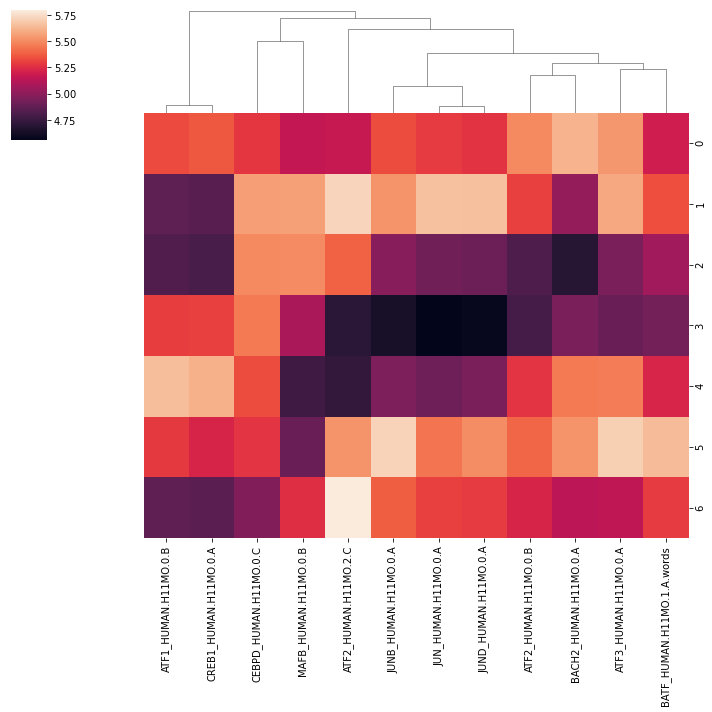

In [62]:
df = pd.DataFrame(df)
sns.clustermap(df, row_cluster=False)

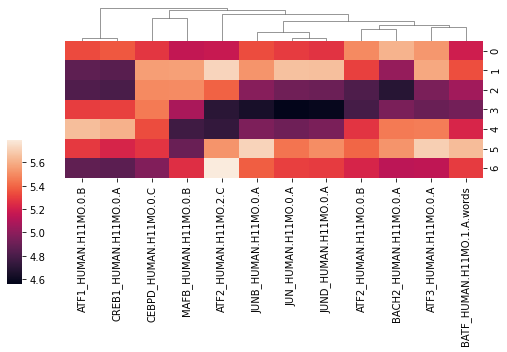

In [60]:
sns.clustermap(
    df,
    figsize=(7, 5),
    row_cluster=False,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4)
)

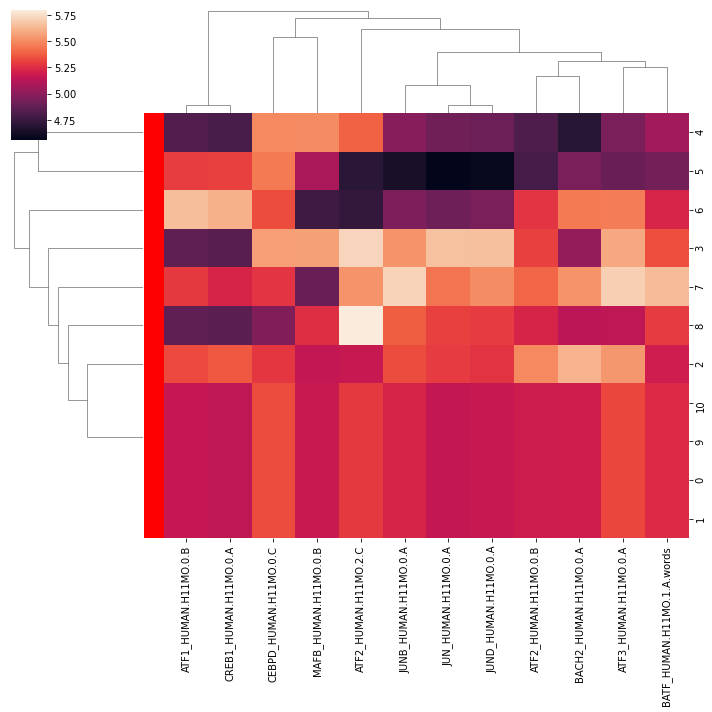

In [56]:
###WRONG

lut = {col: 'r' for col in df.columns}
species = df.columns
row_colors = species.map(lut)
sns.clustermap(df, row_colors=row_colors)

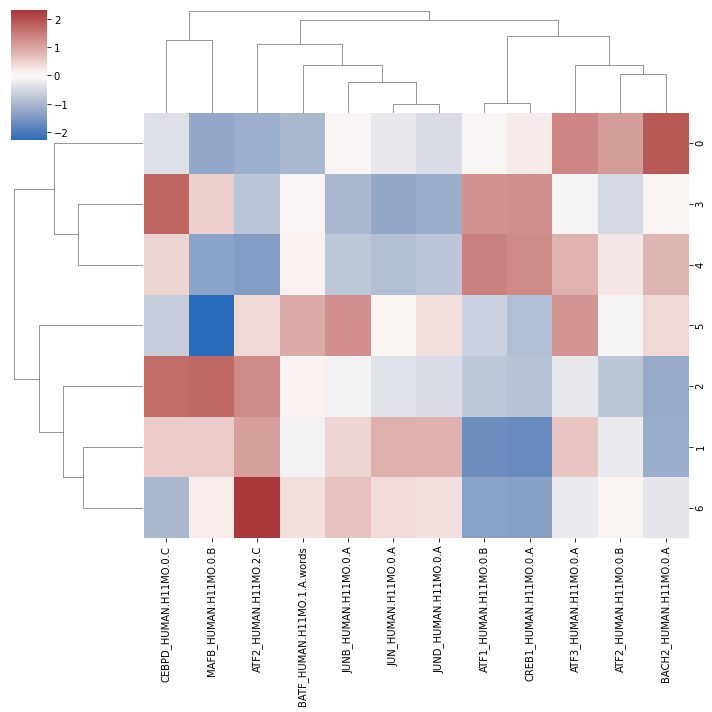

In [61]:
sns.clustermap(df, z_score=0, cmap="vlag", center=0)

In [65]:
new_df = df[['ATF1_HUMAN.H11MO.0.B', 'ATF2_HUMAN.H11MO.0.B']]

print(new_df)

   ATF1_HUMAN.H11MO.0.B  ATF2_HUMAN.H11MO.0.B
0               5.32906              5.493546
1               4.86440              5.308367
2               4.81946              4.815179
3               5.29574              4.785120
4               5.64684              5.270378
5               5.28568              5.399900
6               4.86722              5.220976


In [82]:

matrix1 = new_df['ATF1_HUMAN.H11MO.0.B'].values
matrix2 = new_df['ATF2_HUMAN.H11MO.0.B'].values
def calculate_pcc(matrix1, matrix2):
    corr_matrix = np.corrcoef(matrix1, matrix2)
    pcc, _ = pearsonr(matrix1.flatten(), matrix2.flatten())
    return pcc

pcc = calculate_pcc(matrix1, matrix2)

print("Pearson korelasyon katsayısı:", pcc)

Pearson korelasyon katsayısı: 0.27879398032907626


In [93]:
def find_best_alignment(matrix1, matrix2):
    best_pcc = -1
    best_alignment_indices = None
    min_length = 6
    max_length = min(len(matrix1), len(matrix2))
    for length in range(min_length, max_length + 1):
        for i in range(len(matrix1) - length + 1):
            for j in range(len(matrix2) - length + 1):
                sub_matrix1 = matrix1[i:i+length]
                sub_matrix2 = matrix2[j:j+length]
                pcc = calculate_pcc(sub_matrix1, sub_matrix2)
                if pcc > best_pcc:
                    best_pcc = pcc
                    best_alignment_indices = (i, j, length)
    return best_pcc, best_alignment_indices

# find_best_alignment fonksiyonunu çağırarak en iyi hizalamayı bulun
best_pcc, best_indices = find_best_alignment(matrix1, matrix2)

print("the best corelation number:", best_pcc)
print("En iyi hizalama indeksleri:", best_indices)


the best corelation number: 0.9999999999999999
En iyi hizalama indeksleri: (1, 1, 6)


In [96]:
min_vals = df.min()
max_vals = df.max()

df_normalized = (df - min_vals) / (max_vals - min_vals)

matrix1 = df_normalized.values
matrix2 = df_normalized.values


def calculate_pcc(matrix1, matrix2):
    corr_matrix = np.corrcoef(matrix1, matrix2, rowvar=False)
    pcc, _ = pearsonr(matrix1.flatten(), matrix2.flatten())
    return pcc

def find_best_alignment(matrix1, matrix2):
    best_pcc = -1
    best_alignment_indices = None
    min_length = 6
    max_length = min(matrix1.shape[0], matrix2.shape[0])
    for length in range(min_length, max_length + 1):
        for i in range(matrix1.shape[0] - length + 1):
            for j in range(matrix2.shape[0] - length + 1):
                sub_matrix1 = matrix1[i:i+length, :]
                sub_matrix2 = matrix2[j:j+length, :]
                pcc = calculate_pcc(sub_matrix1, sub_matrix2)
                if pcc > best_pcc:
                    best_pcc = pcc
                    best_alignment_indices = (i, j, length)
    return best_pcc, best_alignment_indices

# find_best_alignment fonksiyonunu çağırarak en iyi hizalamayı bulun
best_pcc, best_indices = find_best_alignment(matrix1, matrix2)

print("the best corelation number:", best_pcc)
print("the best allign index:", best_indices)


the best corelation number: 1.0
the best allign index: (1, 1, 6)
